In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
colunas = ['CO_CATEGAD','CO_GRUPO','CO_REGIAO_CURSO','TP_SEXO','TP_PRES','NT_GER','QE_I02','QE_I08','QE_I13','QE_I15','QE_I17'] #selecionando apenas as colunas necessarias

microdados = pd.read_csv('MICRODADOS_ENADE_2017.csv',sep=';',usecols=colunas,decimal=',') #carregando arquivo, apenas com as colunas desejadas, usando como separador ';'

In [3]:
microdados_sul = microdados.query('CO_GRUPO == 72 | CO_GRUPO == 79 | CO_GRUPO == 4003 | CO_GRUPO == 4004 | CO_GRUPO == 4005 | CO_GRUPO == 4006 | CO_GRUPO == 6409') #filtrando alunos de cursos da area de TI

In [4]:
microdados_sul = microdados_sul.query('CO_REGIAO_CURSO == 4') #filtrando apenas alunos cuja IES se localiza na região sul do país

In [5]:
microdados_sul = microdados_sul.astype({'TP_PRES':int}) #convertendo tipo dos dados

In [6]:
microdados_sul = microdados_sul.query('TP_PRES == 555') #selecionando apenas alunos presentes no ENADE com nota valida

In [7]:
microdados_sul = microdados_sul.loc[microdados_sul.QE_I15.notnull()] #removendo alunos que deixaram questionario em branco

In [8]:
microdados_sul = microdados_sul.loc[microdados_sul.NT_GER.notnull()] #removendo alunos com notas em branco

In [9]:
#Transformaçao
microdados_sul['CO_CATEGAD'].replace({1:0,2:0,3:0},inplace=True) #publica 
microdados_sul['CO_CATEGAD'].replace({4:1,5:1,7:1},inplace=True) #privada
#separar universidade publica (0) de privada (1)

In [10]:
#agrupando faixas de renda
microdados_sul['QE_I08'].replace({'B':'A'},inplace=True) #ate 3 salarios
microdados_sul['QE_I08'].replace({'C':'B','D':'B'},inplace=True) #3 a 6 salarios 
microdados_sul['QE_I08'].replace({'E':'C','F':'C'},inplace=True) #6 a 30 salarios 
microdados_sul['QE_I08'].replace({'G':'D'},inplace=True) #mais de 30 salarios 

In [11]:
#cotista e nao cotista
microdados_sul['QE_I15'].replace({'C':'B','D':'B','E':'B','F':'B'},inplace=True) #cotista

In [12]:
#separando por tipo de ensino medio
microdados_sul['QE_I17'].replace({'D':'A'},inplace=True) #todo tempo ou maior parte pub
microdados_sul['QE_I17'].replace({'E':'B'},inplace=True) #todo tempo ou maior parte privada
microdados_sul['QE_I17'].replace({'F':'C'},inplace=True) #todo tempo ou maior parte exterior

In [13]:
cursos_dict = {72: 'Tecnologia em Análise e Desenvolvimento de Sistemas', 79:'Tecnologia em Redes de Computadores',4003: 'Engenharia Da Computação', 4004:'Ciência Da Computação (Bacharelado)',4005:'Ciência da Computação (Licenciatura)',4006: 'Sistemas De Informação',6409: 'Tecnologia em Gestão da Tecnologia da Informação'}

In [14]:
cursos_abrev_dict = {'ADS': 'Tecnologia em Análise e Desenvolvimento de Sistemas', 'RC':'Tecnologia em Redes de Computadores','EC': 'Engenharia Da Computação', 'BCC':'Ciência Da Computação (Bacharelado)','LCC':'Ciência da Computação (Licenciatura)','SI': 'Sistemas De Informação','GTI': 'Tecnologia em Gestão da Tecnologia da Informação'}

In [15]:
descricao_cursos = pd.DataFrame.from_dict(cursos_abrev_dict,orient='index',columns=['Descrição'])

In [16]:
#Quantidade de alunos por curso
alunos_por_curso = microdados_sul['CO_GRUPO'].value_counts().to_frame('Quantidade de alunos').rename(index=cursos_dict)

In [17]:
#Quantidade de alunos em publicas e privadas na regiao
qnt_pub_privada = microdados_sul['CO_CATEGAD'].value_counts().to_frame('Quantidade de alunos').rename(index={0:'Pública',1:'Privada'})

In [18]:
#Quantidade de alunos em publicas e privadas por curso
curso_pub_privada = microdados_sul.groupby(['CO_GRUPO']).CO_CATEGAD.value_counts().unstack().rename(index=cursos_dict,columns={0:'Pública',1:'Privada'}).rename_axis('',axis='columns').rename_axis('')

In [19]:
###NOVO --- EXTRA
diretorio = '/questao_extra'

try:
    os.mkdir(os.getcwd()+diretorio,0o777) #criando um diretorio para a questao
except OSError as error:  
    print(error)

qnt_pub_privada.to_csv('.{}/{}.csv'.format(diretorio,'alunos_pub_privada'),index=True)
curso_pub_privada.to_csv('.{}/{}.csv'.format(diretorio,'alunos_pub_privada_cursos'),index=True)
descricao_cursos.to_csv('.{}/{}.csv'.format(diretorio,'descricao_cursos'),index=True)
alunos_por_curso.to_csv('.{}/{}.csv'.format(diretorio,'alunos_por_curso'),index=True)

In [20]:
cotista_dict = {'A':'Não cotista','B':'Cotista'}

In [21]:
#Quantidade de cotista
qnt_cotista = microdados_sul['QE_I15'].value_counts().to_frame('Quantidade de alunos').rename(index=cotista_dict)

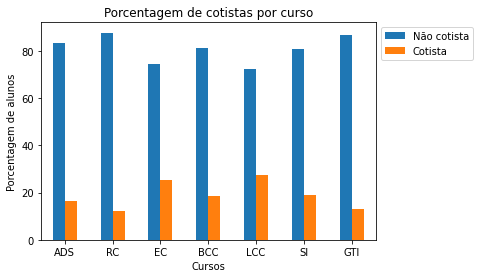

In [54]:
#Questao1 - Quantidade de cotistas por curso?
cotistas_curso = (microdados_sul.groupby(['CO_GRUPO']).QE_I15.value_counts(normalize=True).unstack().fillna(0).round(4)*100).plot(kind='bar',rot=0)
cotistas_curso.set_xlabel('Cursos')
cotistas_curso.set_title('Porcentagem de cotistas por curso')
cotistas_curso.set_ylabel('Porcentagem de alunos')
cotistas_curso.set_xticklabels(cursos_abrev_dict.keys())
cotistas_curso.legend(labels=cotista_dict.values(),bbox_to_anchor=(1,1),loc=0)

In [23]:
diretorio = '/questao1'

try:
    os.mkdir(os.getcwd()+diretorio,0o777) #criando um diretorio para a questao
except OSError as error:  
    print(error)

qnt_cotista.to_csv('.{}/{}.csv'.format(diretorio,'quantidade_cotista'),index=True)
cotistas_curso.get_figure().savefig('.{}/{}.png'.format(diretorio,'quantidade_cotista_curso'),bbox_extra_artists=(cotistas_curso.get_legend(),), bbox_inches='tight')

In [24]:
#quantidade de alunos por raça
raca_dict = {'A':'Branca','B':'Preta','C':'Amarela','D':'Parda','E':'Indígena','F':'Não declarada'}
qnt_aluno_raca = microdados_sul['QE_I02'].value_counts().to_frame('Quantidade de alunos').rename(index=raca_dict)

Text(0, 0.5, 'Porcentagem de alunos')

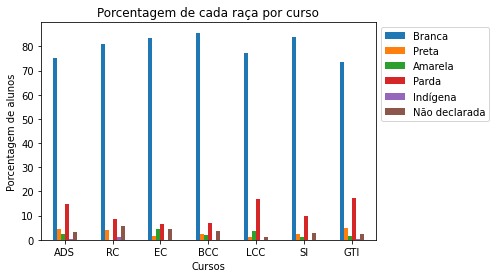

In [25]:
#Questao2 - Qual a quantidade de cada raça por curso?

qnt_raca_curso = (microdados_sul.groupby(['CO_GRUPO']).QE_I02.value_counts(normalize=True).unstack().fillna(0).round(4)*100).plot(kind='bar',rot=0)
qnt_raca_curso.set_xticklabels(cursos_abrev_dict.keys())
qnt_raca_curso.legend(labels=raca_dict.values(),bbox_to_anchor=(1,1),loc=0)
qnt_raca_curso.set_xlabel('Cursos')
qnt_raca_curso.set_title('Porcentagem de cada raça por curso')
qnt_raca_curso.set_ylabel('Porcentagem de alunos')

In [26]:
diretorio = '/questao2'

try:
    os.mkdir(os.getcwd()+diretorio,0o777) #criando um diretorio para a questao
except OSError as error:  
    print(error)

qnt_aluno_raca.to_csv('.{}/{}.csv'.format(diretorio,'quantidade_aluno_raca'),index=True)
qnt_raca_curso.get_figure().savefig('.{}/{}.png'.format(diretorio,'quantidade_aluno_raca_curso'),bbox_extra_artists=(qnt_raca_curso.get_legend(),), bbox_inches='tight',dpi=300)

In [27]:
#quantidade por sexo
sexo_dict = {'F':'Feminino','M':'Masculino'}
qnt_sexo = microdados_sul['TP_SEXO'].value_counts().to_frame('Quantidade de alunos').rename(index=sexo_dict)

Text(0, 0.5, 'Porcentagem de alunos')

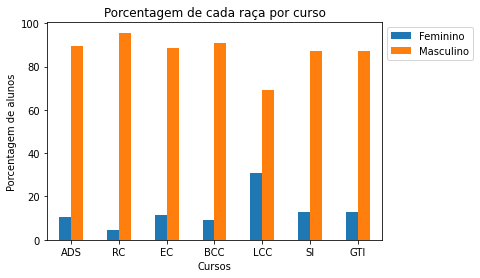

In [50]:
#Questao3 - Qual a presença de cada sexo por curso?

sexo_curso = (microdados_sul.groupby(['CO_GRUPO']).TP_SEXO.value_counts(normalize=True).unstack().fillna(0).round(4)*100).plot(kind='bar',rot=0)
sexo_curso.set_xticklabels(cursos_abrev_dict.keys())
sexo_curso.legend(labels=sexo_dict.values(),bbox_to_anchor=(1,1),loc=0)
sexo_curso.set_xlabel('Cursos')
sexo_curso.set_title('Porcentagem de cada raça por curso')
sexo_curso.set_ylabel('Porcentagem de alunos')

In [29]:
diretorio = '/questao3'

try:
    os.mkdir(os.getcwd()+diretorio,0o777) #criando um diretorio para a questao
except OSError as error:  
    print(error)

qnt_sexo.to_csv('.{}/{}.csv'.format(diretorio,'quantidade_aluno_sexo'),index=True)
sexo_curso.get_figure().savefig('.{}/{}.png'.format(diretorio,'quantidade_aluno_sexo_curso'),bbox_extra_artists=(sexo_curso.get_legend(),), bbox_inches='tight',dpi=300)

In [30]:
abrev_qe13_dict = {'Nenhum':'Nenhum','IC':'Bolsa de iniciação científica','Extensão':'Bolsa de extensão','Monitoria':'Bolsa de monitoria','PET':'Bolsa PET','Outro':'Outro'}
qe13_translate = {'A':'Nenhum','B':'IC','C':'Extensão','D':'Monitoria','E':'PET','F':'Outro'}

In [31]:
qnt_bolsa =  microdados_sul.QE_I13.value_counts().to_frame('Quantidade de alunos').rename(index=qe13_translate)

In [32]:
descricao_bolsa = pd.DataFrame.from_dict(abrev_qe13_dict,orient='index',columns=['Descrição'])

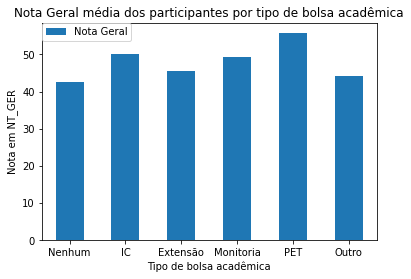

In [33]:
#Questao4 - Alunos com melhor nota no ENADE receberam bolsa?

#comparar QE_I13 com notas
bolsa_nota_ger, (bolsa_nota_ger_mean) = plt.subplots(1,1)

microdados_sul.groupby('QE_I13')['NT_GER'].mean().plot(kind='bar',rot=0,ax=bolsa_nota_ger_mean)

bolsa_nota_ger_mean.set_title('Nota Geral média dos participantes por tipo de bolsa acadêmica')
bolsa_nota_ger_mean.set_ylabel('Nota em NT_GER')
bolsa_nota_ger_mean.set_xlabel('Tipo de bolsa acadêmica')
bolsa_nota_ger_mean.set_xticklabels(abrev_qe13_dict.keys())
bolsa_nota_ger_mean.legend(labels=['Nota Geral'],loc=2,borderaxespad=0)

In [34]:
diretorio = '/questao4'

try:
    os.mkdir(os.getcwd()+diretorio,0o777) #criando um diretorio para a questao
except OSError as error:  
    print(error)

descricao_bolsa.to_csv('.{}/{}.csv'.format(diretorio,'descricao_bolsa'),index=True)
qnt_bolsa.to_csv('.{}/{}.csv'.format(diretorio,'quantidade_alunos_bolsa'),index=True)
bolsa_nota_ger.savefig('.{}/{}.png'.format(diretorio,'bolsa_nota_ger'),dpi=300)

In [35]:
abrev_qe08_dict = {'Até 3':'Até 3 salários minimos','De 3 a 6':'De 3 a 6 salários minimos','De 6 a 30':'De 6 a 30 salários minimos','Mais de 30':'Mais de 30 salários minimos'}
qe08_translate = {'A':'Até 3','B':'De 3 a 6','C':'De 6 a 30','D':'Mais de 30'}

In [36]:
qnt_renda_familiar =  microdados_sul.QE_I08.value_counts().to_frame('Quantidade de alunos').rename(index=qe08_translate)

In [37]:
descricao_renda = pd.DataFrame.from_dict(abrev_qe08_dict,orient='index',columns=['Descrição'])

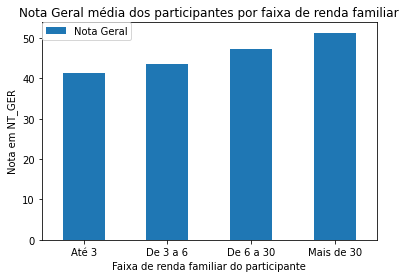

In [38]:
#Questao5 - A situaçao financeira influencia a nota no ENADE?

#comparar QE_I08 com NT_GER

situacao_financeira_nota_ger08, (ger_mean_08) = plt.subplots(1,1)

microdados_sul.groupby('QE_I08')['NT_GER'].mean().plot(kind='bar',rot=0,ax=ger_mean_08)

ger_mean_08.set_title('Nota Geral média dos participantes por faixa de renda familiar')
ger_mean_08.set_ylabel('Nota em NT_GER')
ger_mean_08.set_xlabel('Faixa de renda familiar do participante')
ger_mean_08.set_xticklabels(abrev_qe08_dict.keys())
ger_mean_08.legend(labels=['Nota Geral'],loc=2,borderaxespad=0)

In [39]:
diretorio = '/questao5'

try:
    os.mkdir(os.getcwd()+diretorio,0o777) #criando um diretorio para a questao
except OSError as error:  
    print(error)

descricao_renda.to_csv('.{}/{}.csv'.format(diretorio,'descricao_renda_familiar'),index=True)
qnt_renda_familiar.to_csv('.{}/{}.csv'.format(diretorio,'quantidade_alunos_por_renda'),index=True)
situacao_financeira_nota_ger08.savefig('.{}/{}.png'.format(diretorio,'situacao_financeira_nota_ger08'),dpi=300)

In [40]:
#Quantidade de ensino medio
EM_abrev_dict = {'Pública':'Todo ou maior parte em escola pública','Privada':'Todo ou maior parte em escola privada','Exterior':'Todo ou maior parte no exterior'}
EM_translate = {'A':'Pública','B':'Privada','C':'Exterior'}

descricao_ensino_medio = pd.DataFrame.from_dict(EM_abrev_dict,orient='index',columns=['Descrição'])

In [41]:
qnt_alunos_EM = microdados_sul.QE_I17.value_counts().to_frame('Quantidade de alunos').rename(index=EM_translate)

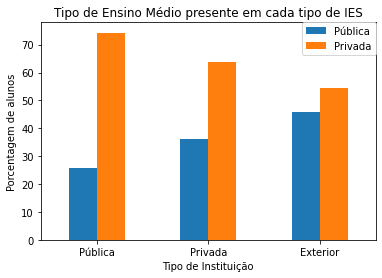

In [42]:
#Questao6 -Tipo de ensino medio por tipo de universidade?
medio_universidade, (grafico_em) = plt.subplots(1,1)
(microdados_sul.groupby(['QE_I17']).CO_CATEGAD.value_counts(normalize=True).unstack().round(4)*100).plot(kind='bar',rot=0,ax=grafico_em)
grafico_em.set_title('Tipo de Ensino Médio presente em cada tipo de IES')
grafico_em.set_ylabel('Porcentagem de alunos')
grafico_em.set_xticklabels(EM_abrev_dict.keys())
grafico_em.set_xlabel('Tipo de Instituição')
grafico_em.legend(bbox_to_anchor=(1,1),loc=0,borderaxespad=0,labels=['Pública','Privada'])

In [43]:
#####NOVO
diretorio = '/questao6'

try:
    os.mkdir(os.getcwd()+diretorio,0o777) #criando um diretorio para a questao
except OSError as error:  
    print(error)

descricao_ensino_medio.to_csv('.{}/{}.csv'.format(diretorio,'descricao_ensino_medio'),index=True)
qnt_alunos_EM.to_csv('.{}/{}.csv'.format(diretorio,'quantidade_alunos_por_ensino_medio'),index=True)
medio_universidade.savefig('.{}/{}.png'.format(diretorio,'ensino_medio_tipo_instituicao'),dpi=300)